# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- U.S. SEC and CFTC To Investigate Failed Hedge Fund Three Arrows Capital.  The U.S. regulators have finally decided to step into the investigation of failed hedge fund Three Arrows Capital (3AC), which was one of the major causes of this year&#8217;s crypto market crash. The collapse of the Terra ecosystem in May pushed 3AC into a major collapse from being the world&#8217;s largest crypto hedge fund. Two The post U.S. SEC and CFTC To Investigate Failed Hedge Fund Three Arrows Capital appeared first on CoinGape. ... [| Skaityti daugiau](https://coingape.com/u-s-sec-and-cftc-to-investigate-failed-hedge-fund-three-arrows-capital/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- What 2 new studies reveal about long COVID in Canada | CBC News.  Two new large-scale reports, one published by Statistics Canada and the other in the Canadian Medical Association Journal, are giving a clearer picture of the long-term impacts of COVID-19 infections on Canadians and the health-care system. ... [| Skaityti daugiau](http://www.cbc.ca/news/health/long-covid-statistics-canada-1.6619649) 

### Kainų kaita pandemijos metu

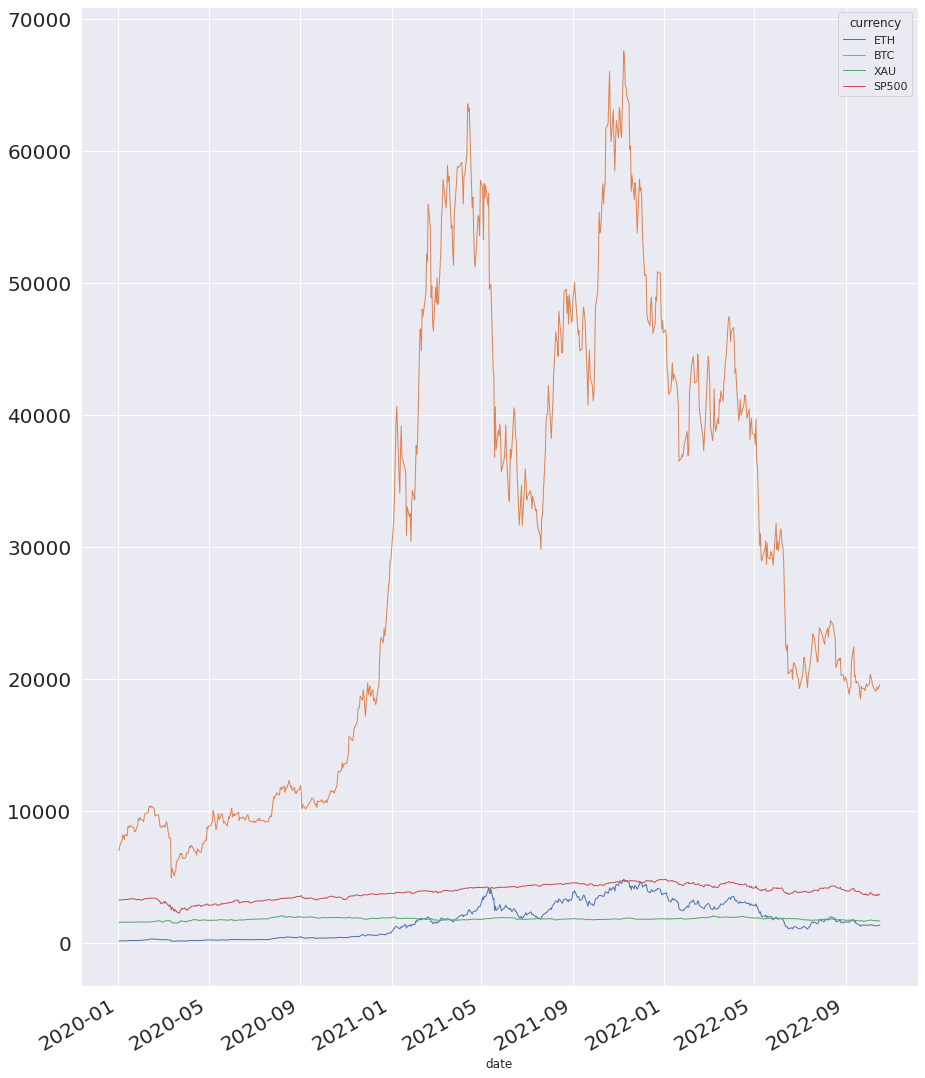

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.898022,0.253771,0.914410
BTC,0.898022,1.000000,0.228565,0.844121
XAU,0.253771,0.228565,1.000000,0.360456
SP500,0.914410,0.844121,0.360456,1.000000


In [8]:
#hide ### Koreliacijos matrica.

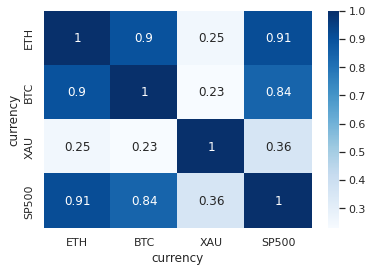

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')